# Modes of a Vibrating Building Under Sinusoidal Forcing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from resonance.linear_systems import FourStoryBuildingSystem

This gives a bit nicer printing of large NumPy arrays.

In [2]:
np.set_printoptions(precision=5, linewidth=100, suppress=True)

In [3]:
%matplotlib inline

# Simulate the four story building with sinusoidal forcing at each floor.

In [4]:
sys = FourStoryBuildingSystem()

In [5]:
M, C, K = sys.canonical_coefficients()

In [6]:
L = np.linalg.cholesky(M)

In [7]:
K_tilde = np.linalg.inv(L) @ K @ np.linalg.inv(L.T)

In [8]:
evals, evecs = np.linalg.eig(K_tilde)

In [9]:
ws = np.sqrt(evals)
ws

array([ 2.10122,  1.71293,  1.11803,  0.38829])

# Forcing the fourth floor at the largest natural frequency

In [10]:
sys.constants['amplitude'] = 100  # N
sys.constants['frequency'] = ws[0]  # rad/s

In [11]:
def push_floor(amplitude, frequency, time):
    return 0, 0, 0, amplitude * np.sin(frequency * time)

In [12]:
sys.forcing_func = push_floor

In [13]:
traj = sys.forced_response(50)

<IPython.core.display.Javascript object>


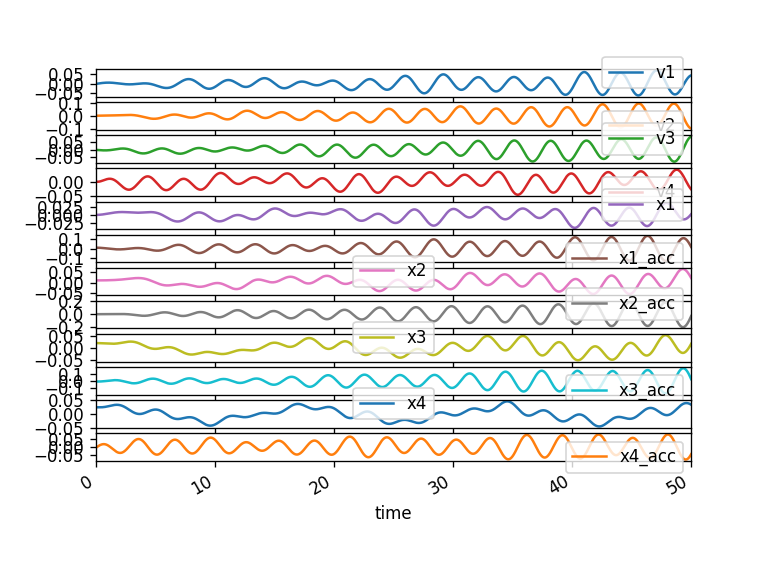

In [14]:
traj.plot(subplots=True);

<IPython.core.display.Javascript object>


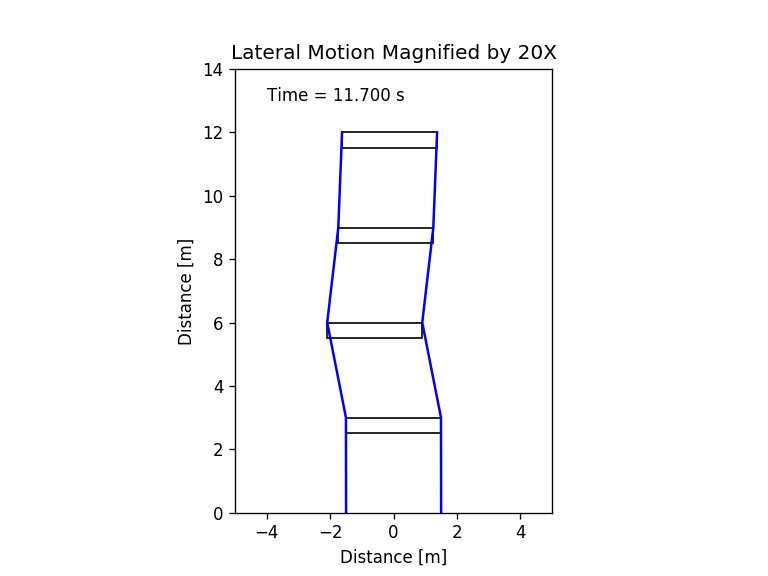

In [15]:
sys.animate_configuration(fps=10)

# Forcing the 4th floor at the slowest natural frequency

In [16]:
sys.constants['amplitude'] = 100  # N
sys.constants['frequency'] = ws[3]  # rad/s

def push_floor(amplitude, frequency, time):
    return 0, 0, 0, amplitude * np.sin(frequency * time)

sys.forcing_func = push_floor

In [17]:
traj = sys.forced_response(50)

<IPython.core.display.Javascript object>


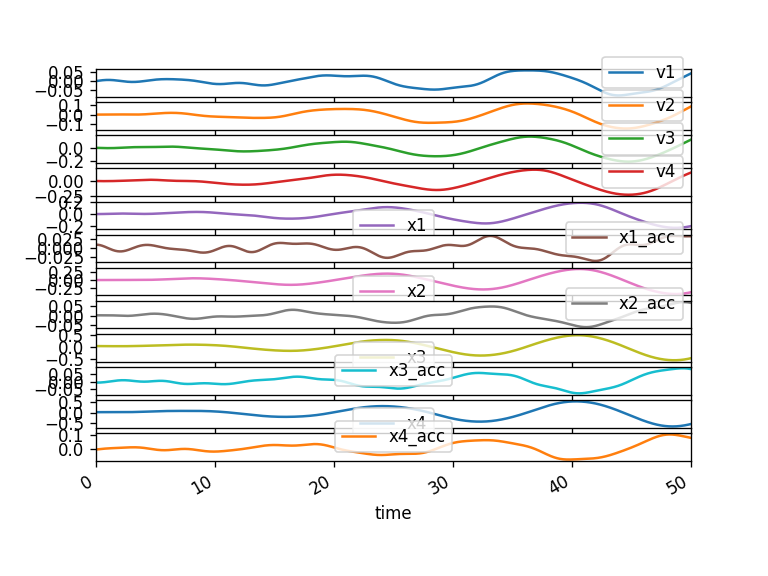

In [18]:
traj.plot(subplots=True);

<IPython.core.display.Javascript object>


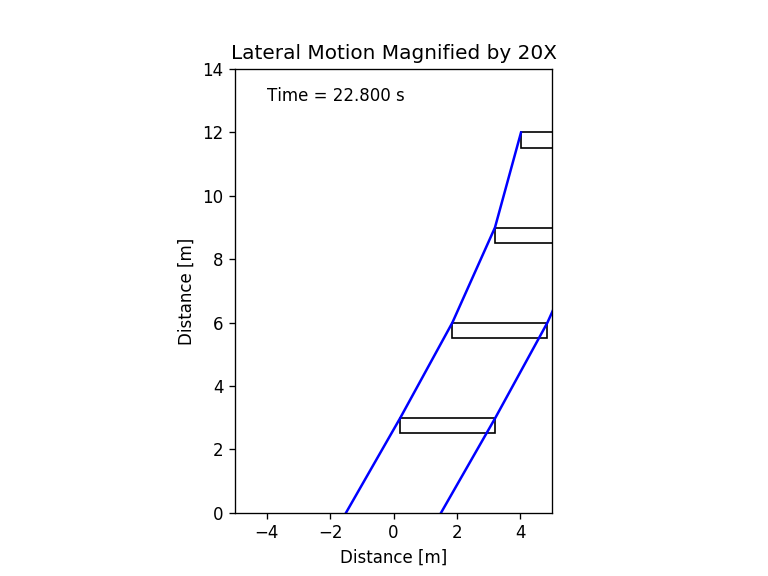

In [19]:
sys.animate_configuration(fps=10)

# Forcing the 3rd floor at the natural frequency that has a node

In [20]:
sys.constants['amplitude'] = 100  # N
sys.constants['frequency'] = ws[2]  # rad/s

def push_floor(amplitude, frequency, time):
    return 0, 0, amplitude * np.sin(frequency * time), 0

sys.forcing_func = push_floor

In [21]:
traj = sys.forced_response(50)

<IPython.core.display.Javascript object>


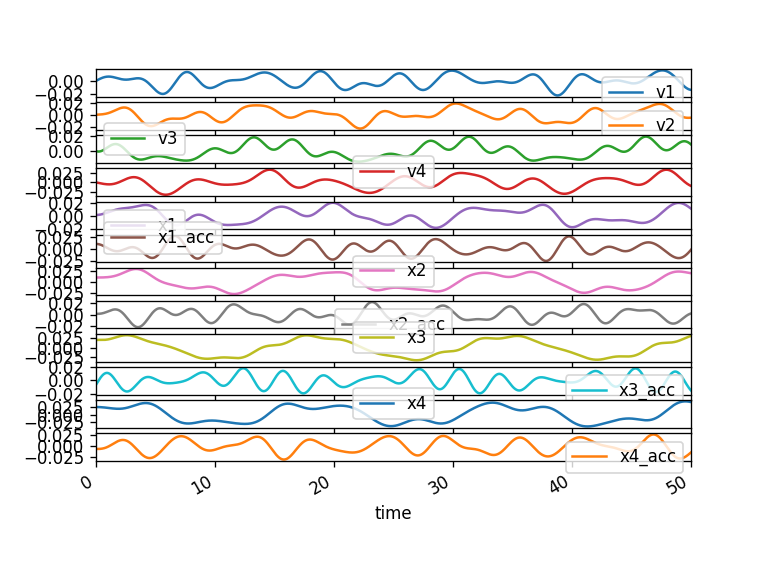

In [22]:
traj.plot(subplots=True);

<IPython.core.display.Javascript object>


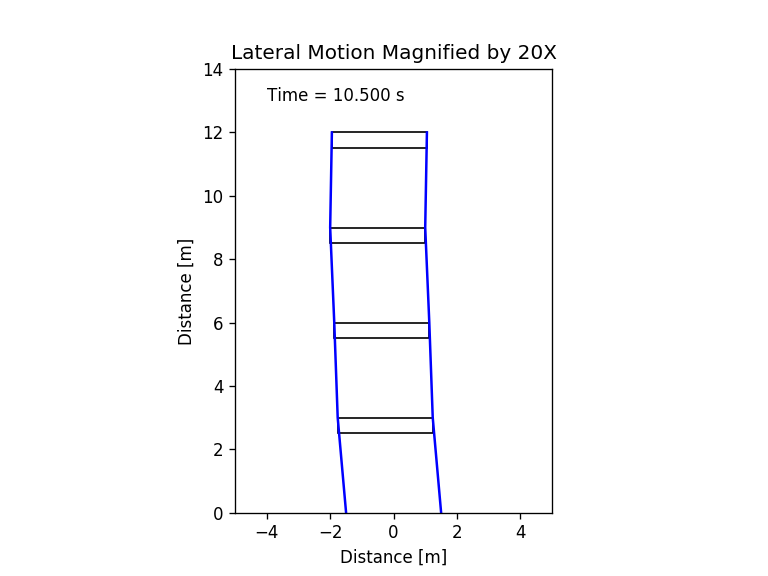

In [23]:
sys.animate_configuration(fps=10)